In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML/DataSet/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

1. Data cleaning
2. EDA
3. Text Preprocessing(remove the noise from text(stem,punctuation, suffices and stop words that do not give us any information.)
4. model building
5. Evaluation
6. improvement depending upon the evaluation


1. **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop last three column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#rename the column
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)


In [ ]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['Target']=encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#to check missing value
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [ ]:
#to check for duplicate values
df.duplicated().sum()

403

In [ ]:
# remove duplicate value
df=df.drop_duplicates(keep='first')

In [ ]:
#again check for duplicate
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

********************************Cleaning Compleated*****************************



2. **EDA (is used to understand the data)**
    1. How much  data is spam and Ham


In [ ]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

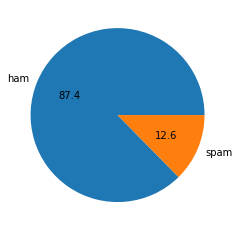

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),autopct="%0.1f",labels=['ham','spam'])
plt.show()

Now we can analyze here
1. how many alphabat, words and sentences are using in msg.
2. for Deeper analysis we are designing three new column in our dataset

      i) no. of charecter in the msg

      ii) no. of words in the msg

      iii) no. of sentences in the msg

      for doing this above things we need to use library nltk.

by above analysis we can say data is imbalanced


In [ ]:
import nltk
#some dependencies are there to use nltk library that is 'punkt' ('Punkt' Sentence Tokenizer. This tokenizer divides a text into a list of sentences)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#to know no of Character in msg
df['num_character']=df['Text'].apply(len)

<ipython-input-22-c16ca4f71e71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_character']=df['Text'].apply(len)


In [ ]:
df.head()

,Target,Text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#To know the number of words
df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

<ipython-input-24-6c11a032c727>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [ ]:
df.head()

,Target,Text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#To know number of sentences in msg
df['num_sent']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

<ipython-input-26-6e719a4542e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [ ]:
df.head()

,Target,Text,num_character,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Target         5169 non-null   int64 
 1   Text           5169 non-null   object
 2   num_character  5169 non-null   int64 
 3   num_words      5169 non-null   int64 
 4   num_sent       5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


In [ ]:
#want to know about three new added column
df[['num_character','num_words','num_sent']].describe()

,num_character,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
#Analysys of Ham msg
df[df['Target']==0][['num_character','num_words','num_sent']].describe()

,num_character,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
#Analysys of spam msg
df[df['Target']==1][['num_character','num_words','num_sent']].describe()


,num_character,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


from above Analysis we can say size of Spam msg is greter than size of ham msg

In [ ]:
#now plot Histogram for spam and Ham Msg based on num_character
import seaborn as sns

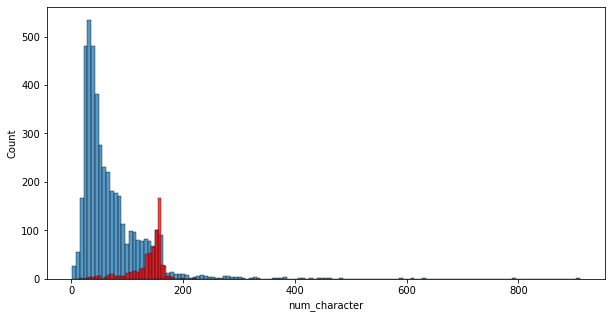

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot()
sns.histplot(df[df['Target']==0]['num_character'])
sns.histplot(df[df['Target']==1]['num_character'],color='red')


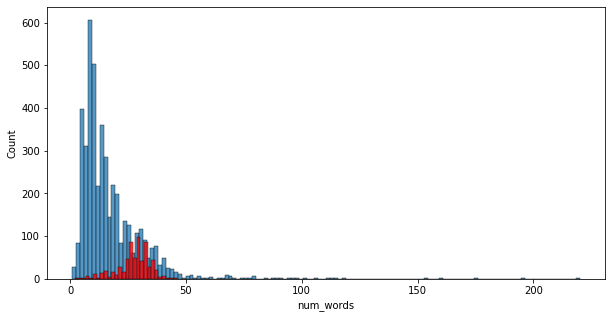

In [ ]:
#now plot Histogram for spam and Ham Msg based on num_words
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

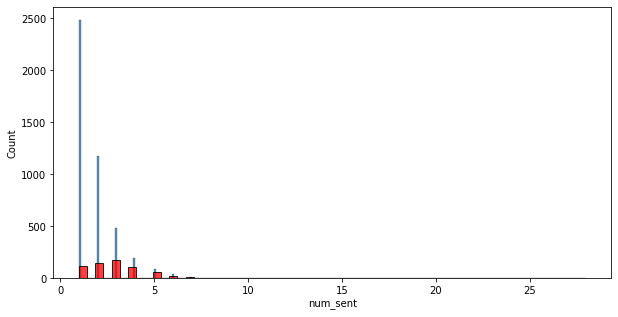

In [ ]:
#now plot Histogram for spam and Ham Msg based on num_sent
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']==0]['num_sent'])
sns.histplot(df[df['Target']==1]['num_sent'],color='red')

<Figure size 720x360 with 0 Axes>

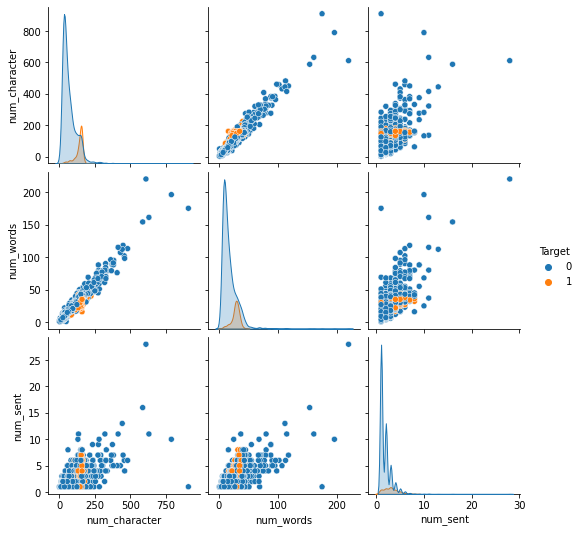

In [ ]:
# now Check how this three columns are related with each other
plt.figure(figsize=(10,5))
sns.pairplot(df,hue='Target')

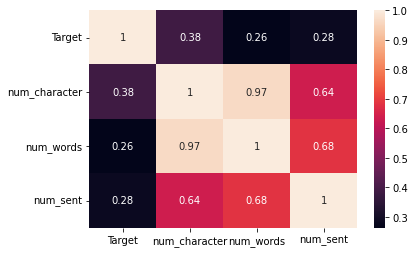

In [ ]:
#find coorelation between the data
sns.heatmap(df.corr(),annot=True)

3. Text Preprocessing.

      i) Lower case

      ii) Tokenization

      iii)Removing Special Charecter

      iv) Removing Stop word and Punctuation
      
      v) Stemming

In [ ]:

def text_transform(text):
  text=text.lower() # to convert into lower case
  # print(text)


  text=nltk.word_tokenize(text)# to tokenize the text
  # print(text)


  y=[]# to remove special character
  for i in text:
    if i.isalnum():# isalnum() used to check alpha numeric value
      y.append(i)
  text=y[:]
  # print(text)



  y.clear()
  for i in text :#to remove stopwords
    if i not in stopwords.words() and i not in string.punctuation:
      y.append(i)
  text=y[:]
  # print(text)



  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
text_transform('I am Living in @indore')

NameError: name 'nltk' is not defined

In [ ]:
# to check stop words (the word which is used only for sentence formation it will not affect the meaning of the sentence)
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


In [ ]:
#to check the list of puntuation

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# for Stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
print(ps.stem('pointing'))
print(ps.stem('projected'))

point
project


In [ ]:
# Apply text_transform function on Df['Text']
df['text_transformed']=df['Text'].apply(text_transform)

<ipython-input-45-d3b4cba1ac40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_transformed']=df['Text'].apply(text_transform)


In [ ]:
df.head()

,Target,Text,num_character,num_words,num_sent,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,jurong point crazi avail bugi great world buff...
1,0,Ok lar... Joking wif u oni...,29,8,2,lar joke wif
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win cup final tkt 21st ...
3,0,U dun say so early hor... U c already then say...,49,13,1,dun earli
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,usf live


In [ ]:
df.to_csv("spamdetection.csv")

In [ ]:
#df=pd.read_csv("spamdetection.csv")

In [ ]:
df

,Target,Text,num_character,num_words,num_sent,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,jurong point crazi avail bugi great world buff...
1,0,Ok lar... Joking wif u oni...,29,8,2,lar joke wif
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win cup final tkt 21st ...
3,0,U dun say so early hor... U c already then say...,49,13,1,dun earli
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,usf live
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time 2 contact pound prize 2 claim easi ca...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act interest buy week gave free


**Now design word cloud of spam massages**


In [ ]:
#Now design word cloud of spam massages

from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='yellow')
wc_spam=wc.generate(df[df['Target']==1]['text_transformed'].str.cat(sep=" "))


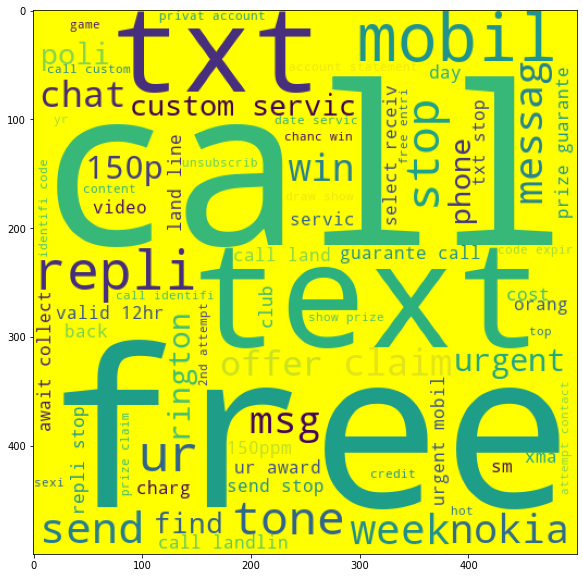

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(wc_spam)


In [ ]:
#Now design word cloud of ham massages
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
wc_ham=wc.generate(df[df['Target']==0]['text_transformed'].str.cat(sep=" "))


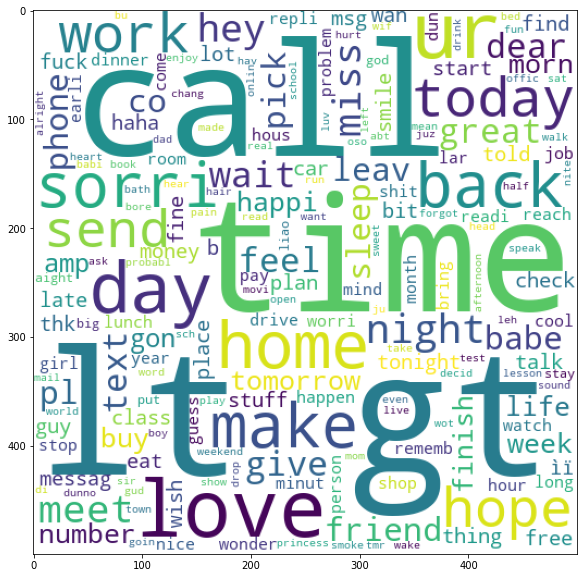

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc_ham)



In [ ]:
#find Top 30 common word in Wordcloud of spam Massage
spam_corpus=[]
for msg in df[df['Target']==1]['text_transformed'].to_list():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
spam_corpus

In [ ]:
len(spam_corpus)


8747

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


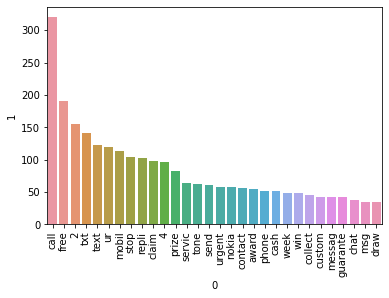

In [ ]:
from collections import Counter
import seaborn as sns
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#find Top 30 common word in Wordcloud of ham Massage
ham_corpus=[]
for msg in df[df['Target']==0]['text_transformed'].to_list():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

23717

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


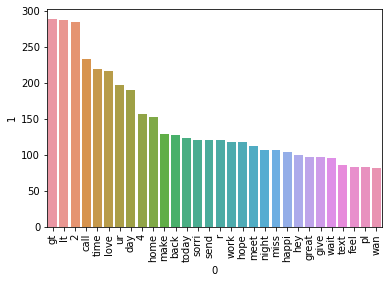

In [ ]:
#from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# df=pd.read_csv("spamdetection.csv", encoding="latin1")

In [ ]:
df

,Unnamed: 0,Target,Text,num_charecter,num_words,num_sent,text_transformed
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,jurong point crazi avail bugi great world buff...
1,1,0,Ok lar... Joking wif u oni...,29,8,2,lar joke wif
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win cup final tkt 21st ...
3,3,0,U dun say so early hor... U c already then say...,49,13,1,dun earli
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,usf live
...,...,...,...,...,...,...,...
5164,5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time 2 contact pound prize 2 claim easi ca...
5165,5568,0,Will Ã_ b going to esplanade fr home?,37,9,1,b esplanad fr home
5166,5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5167,5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act interest buy week gave free


In [ ]:
#model building (here method used to convert  text to vector is countvectorizer)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer#to convert text into vector or number using countvectorizer
# cv=CountVectorizer()
cv=TfidfVectorizer()
X=cv.fit_transform(df['text_transformed']).toarray()

In [ ]:
X.shape

(5169, 6360)

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)


In [ ]:
#to test accuracy Score,confusion metrics and precision score using gnb
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8239845261121856
[[738 158]
 [ 24 114]]
0.41911764705882354


In [ ]:
#to test accuracy Score,confusion metrics and precision score using mnb
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9555125725338491
[[895   1]
 [ 45  93]]
0.9893617021276596


In [ ]:
#to test accuracy Score,confusion metrics and precision score using bnb
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [ ]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_pred1

array([0, 1, 1, ..., 0, 0, 0])